#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Genaro Rodriguez Vazquez A01150931
* Juan Pablo Acosta López A01794035
* Maria Nelly Porras Alcantar A01793828
* Juan Carlos Torres Luna A01163204

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [8]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate

# models from sklearn to test
from sklearn.dummy import DummyClassifier

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay   

scaler = StandardScaler()

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y 
validación. Usa un random_state=0. 

In [9]:
df = pd.read_csv('australian.dat', sep=" ", header=None)
df = df.rename(columns={0:"A1"})
df = df.rename(columns={1:"A2"})
df = df.rename(columns={2:"A3"})
df = df.rename(columns={3:"A4"})
df = df.rename(columns={4:"A5"})
df = df.rename(columns={5:"A6"})
df = df.rename(columns={6:"A7"})
df = df.rename(columns={7:"A8"})
df = df.rename(columns={8:"A9"})
df = df.rename(columns={9:"A10"})
df = df.rename(columns={10:"A11"})
df = df.rename(columns={11:"A12"})
df = df.rename(columns={12:"A13"})
df = df.rename(columns={13:"A14"})
df = df.rename(columns={14:"A15"})


df .head(3) 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [10]:
y = df[['A15']]
X = df.drop(columns='A15')


Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')


(586, 14) : dimensión de datos de entrada "X" para entrenamiento y validación
(104, 14) : dimensión de datos de entrada "X" para prueba
(586, 1) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(104, 1) : dimensión de variable de salida "Y" para prueba


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. 
Utiliza un Pipeline para evitar el filtrado de información. 


In [11]:
"""
A1: 0,1 CATEGORICAL (formerly: a,b)
A2: continuous.
A3: continuous.
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)
A7: continuous.
A8: 1, 0 CATEGORICAL (formerly: t, f)
A9: 1, 0 CATEGORICAL (formerly: t, f)
A10: continuous.
A11: 1, 0 CATEGORICAL (formerly t, f)
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)
A13: continuous.
A14: continuous.
A15: 1,2 class attribute (formerly: +,-)
"""

#Never put OUTPUT variable on the transformation pipeline where the INPUT transfromation happens, create a new one if needed
quantitative_features = ['A2','A3','A7','A10','A13','A14']
categorical_features = ['A1','A8','A9','A11','A4','A5','A6', 'A12']


quantitative_transformer = Pipeline(
    [
    ('imputer_quantitative', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    ]
)
     
categorical_transformer = Pipeline(
    [
    ('imputer_categorical', SimpleImputer(strategy='most_frequent'))
    ]
)

#Define the column transformer that applies pipelines to the dependent variable
preprocessor = ColumnTransformer(
        transformers = [
            ('quantitative_transformer', quantitative_transformer, quantitative_features),
            ('categorical_transformer', categorical_transformer, categorical_features)
        ], remainder='passthrough'
)

#Call column transformer
XtrainFit = preprocessor.fit(Xtv)
XtrainvalTransf = pd.DataFrame(XtrainFit.transform(Xtv))

New_Labels=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']

XtrainvalTransf.columns = New_Labels
XtrainvalTransf


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.503067,0.560418,1.509487,2.497742,-1.034430,0.750068,1.0,1.0,1.0,1.0,2.0,3.0,5.0,2.0
1,-0.984063,-0.705364,-0.633169,-0.487323,-0.235012,-0.183013,1.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0
2,-0.344997,-0.547516,-0.094633,0.109690,1.078318,-0.079171,1.0,1.0,1.0,1.0,1.0,6.0,4.0,2.0
3,-0.682235,-0.863212,0.084879,0.706703,0.153277,-0.118952,1.0,1.0,1.0,1.0,1.0,9.0,4.0,2.0
4,-0.323920,-0.655412,-0.094633,1.701725,1.443767,-0.177223,1.0,1.0,1.0,1.0,2.0,9.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,-0.548183,-0.355700,-0.310047,-0.288319,-1.034430,-0.179651,1.0,0.0,1.0,0.0,2.0,8.0,4.0,2.0
582,-0.260687,-0.247804,-0.525462,-0.487323,-0.057998,-0.183760,0.0,1.0,0.0,1.0,2.0,3.0,5.0,2.0
583,-0.583593,-0.847227,-0.381852,-0.487323,-0.349214,-0.183573,1.0,0.0,0.0,1.0,2.0,7.0,4.0,2.0
584,1.348780,-0.897179,3.639217,3.492763,-1.034430,2.617723,1.0,1.0,1.0,0.0,2.0,8.0,5.0,2.0


#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto 
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las 
siguientes métricas: accuracy, f1-score, precision y recall.

¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

    Por tratarse de un problema de clasificacion y no de regresion.

In [12]:
Xtraintransf, Xvaltransf, Ytraintransf, Yvaltransf = train_test_split(XtrainvalTransf,ytv, train_size=.85, random_state=1)

#print(Xtv.shape     , ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtraintransf.shape , ': dimensión de datos de entrada "X" para entrenamiento ')
print(Xvaltransf.shape   , ': dimensión de datos de entrada "X" para validación')


#print(ytv.shape, ': dimensión de datos de salida "y" para entrenamiento y validación')
print(Ytraintransf.shape, ': dimensión de datos de salida "y" para entrenamiento ')
print(Yvaltransf.shape, ': dimensión de datos de salida "y" para validación')

#Xtraintransf

(498, 14) : dimensión de datos de entrada "X" para entrenamiento 
(88, 14) : dimensión de datos de entrada "X" para validación
(498, 1) : dimensión de datos de salida "y" para entrenamiento 
(88, 1) : dimensión de datos de salida "y" para validación


In [13]:

dummy_regr = DummyClassifier(strategy="stratified")


dummy_regr.fit(Xtraintransf, Ytraintransf)

#For Training dataset scoring
yhat = pd.DataFrame(dummy_regr.predict(Xtraintransf))

#For validation dataset scoring
ypred = pd.DataFrame(dummy_regr.predict(Xvaltransf))

print("Resultados Dummy Classifier - Entrenamiento")

train_acc = accuracy_score(Ytraintransf,yhat)           
print("acc_train: ",train_acc)

train_f1score = f1_score(Ytraintransf,yhat, average='macro')           
print("F1 score_train: ",train_f1score)

train_prec = precision_score(Ytraintransf,yhat, average='macro')           
print("Precision_train: ",train_prec)

train_recall = recall_score(Ytraintransf,yhat, average='macro')           
print("Recall_train: ",train_recall)

print("\n")

print("Resultados Dummy Classifier - Validacion")

val_acc = accuracy_score(Yvaltransf,ypred)           
print("acc_val: ",val_acc)

val_f1score = f1_score(Yvaltransf,ypred, average='macro')           
print("F1 score_val: ",val_f1score)

val_prec = precision_score(Yvaltransf,ypred, average='macro')           
print("Precision_val: ",val_prec)

val_recall = recall_score(Yvaltransf,ypred, average='macro')           
print("Recall_val: ",val_recall)


Resultados Dummy Classifier - Entrenamiento
acc_train:  0.4919678714859438
F1 score_train:  0.4842293569343753
Precision_train:  0.48456000132106936
Recall_train:  0.48478982300884954


Resultados Dummy Classifier - Validacion
acc_val:  0.5795454545454546
F1 score_val:  0.5669636919803165
Precision_val:  0.5668421052631579
Recall_val:  0.5684636118598383


#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros 
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio 
anterior. 

    El ejercicio anterior no pide errores, sino metricas de desempeno. Por ello, hemos hecho este ejercicio basandonos en lo solicitado anteriormente (accuracy, f1score, recall and precision)

In [14]:
import warnings


warnings.filterwarnings("ignore")

#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)
Recall_scorer = make_scorer(f1_score, greater_is_better= True)

SVM_model = svm.SVC()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)


###################################OJO, CORRER TODAS ESTAS COMBINACIONES TOMA MAS DE 12 HORAS !!!!!!#################
GS_SVM = GridSearchCV(estimator=SVM_model,
            param_grid=({'C':[10, 1, 0.1, 0.01],
                        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree':[None, 2, 3, 4, 5],
                        'gamma': ['scale', 'auto'],
                        'class_weight': ['balanced', None],
                        'max_iter': [100, 500, 1000]}),scoring= Recall_scorer)
                   

GS_SVM_fit = GS_SVM.fit(XtrainvalTransf,ytv.values.ravel())
print(GS_SVM.best_estimator_)
print("Best recall scored=%0.3f):" % GS_SVM.best_score_)

SVC(C=10, class_weight='balanced', degree=2, kernel='poly', max_iter=1000)
Best recall scored=0.855):


In [15]:
BestSVM_Model = svm.SVC(C=10, class_weight='balanced', 
                degree=2, kernel='poly', max_iter=1000, 
                probability=True)

BestSVM_Model.fit(Xtv,ytv)
ypred = BestSVM_Model.predict(Xtest)

print("Resultados Support Vector Machine - Test dataset using requested metrics (custom layout)") 

val_acc = accuracy_score(ytest,ypred)           
print("accuracy: ",val_acc)

val_f1score = f1_score(ytest,ypred, average='macro')           
print("F1 score_val: ",val_f1score)

val_prec = precision_score(ytest,ypred, average='macro')           
print("Precision_val: ",val_prec)

val_recall = recall_score(ytest,ypred, average='macro')           
print("Recall_val: ",val_recall)

Resultados Support Vector Machine - Test dataset using requested metrics (custom layout)
accuracy:  0.625
F1 score_val:  0.5180035650623886
Precision_val:  0.7444444444444445
Recall_val:  0.578335832083958


In [16]:
# Accuracy is not displayed on standard layout, thats why we have both approaches written. We really should use only this due to the fact that
# accuracy is more or less useless.

XtestFit = preprocessor.fit(Xtest)
XtestTransf = XtestFit.transform(Xtest)


ypred = GS_SVM.predict(XtestTransf)

print("Resultados Support Vector Machine - Test dataset (using standard and most used layout)")

print("Confusion matrix:")
print(confusion_matrix(ytest,ypred))
print("\n")
print("Scores:")
print(classification_report(ytest,ypred))#Output

Resultados Support Vector Machine - Test dataset (using standard and most used layout)
Confusion matrix:
[[52  6]
 [ 6 40]]


Scores:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.87      0.87      0.87        46

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. 
Incluye tus conclusiones

    En todas las metricas, el modelo de Maquina Soporte Vectorial super al modelo DummyClassifier por mucho.
    En 3 de las metricas, el modelo DummyClassifier no logra salir del 0% y obtiene un 50% aprox en la precision (Accuracy). Se concluye que es un modelo bastante malo par este tipo de problema de clasificacion.

In [17]:
def get_models():
    """
    Usando los parámetros predeterminados de cada modelo. 
    """
    models = list()
    names = list()

    # DC - DummyClassifier:
    models.append(DummyClassifier())
    names.append('DummyClassifier')

    # SVM - SupportVectorMachine:
    models.append(svm.SVC())
    names.append('SupportVectorMachine')


    return models, names

In [18]:
import warnings
warnings.filterwarnings("ignore")

models, names = get_models()
resultados = list()

mismetricas = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),

}

for i in range(len(models)):
  
  kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)
  pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

  resultadosOU = cross_validate(pipeline, XtrainvalTransf, ytv.values.ravel(), scoring=mismetricas, return_train_score=True, error_score='raise')

  resultados.append(resultadosOU)
  
  print('Training score')

  print('%s:\n \
  mean Accuracy: %.3f (%.4f) \n\
  mean F1 score: %.3f (%.4f) \n\
  mean Precision: %.3f (%.4f)\n\
  mean Recall: %.3f\n' % (names[i],
                            np.mean(resultadosOU['train_Accuracy']),
                            np.std(resultadosOU['train_Accuracy']),
                            np.mean(resultadosOU['train_F1 score']),
                            np.std(resultadosOU['train_F1 score']), 
                            np.mean(resultadosOU['train_Precision']),
                            np.std(resultadosOU['train_Precision']), 
                            np.mean(resultadosOU['train_Recall']),
                            #np.std(resultadosOU['train_Recall'])
                            ))

  print('validation score')

  print('%s:\n \
  mean Accuracy: %.3f (%.4f)  \n\
  mean F1 score: %.3f (%.4f)  \n\
  mean Precision: %.3f (%.4f) \n\
  mean Recall: %.3f\n' % (names[i],
                            np.mean(resultadosOU['test_Accuracy']),
                            np.std(resultadosOU['test_Accuracy']),
                            np.mean(resultadosOU['test_F1 score']),
                            np.std(resultadosOU['test_F1 score']), 
                            np.mean(resultadosOU['test_Precision']),
                            np.std(resultadosOU['test_Precision']), 
                            np.mean(resultadosOU['test_Recall']),
                            #np.std(resultadosOU['test_recall'])
                            ))


Training score
DummyClassifier:
   mean Accuracy: 0.555 (0.0005) 
  mean F1 score: 0.000 (0.0000) 
  mean Precision: 0.000 (0.0000)
  mean Recall: 0.000

validation score
DummyClassifier:
   mean Accuracy: 0.555 (0.0019)  
  mean F1 score: 0.000 (0.0000)  
  mean Precision: 0.000 (0.0000) 
  mean Recall: 0.000

Training score
SupportVectorMachine:
   mean Accuracy: 0.864 (0.0101) 
  mean F1 score: 0.847 (0.0118) 
  mean Precision: 0.852 (0.0097)
  mean Recall: 0.841

validation score
SupportVectorMachine:
   mean Accuracy: 0.850 (0.0306)  
  mean F1 score: 0.828 (0.0375)  
  mean Precision: 0.844 (0.0427) 
  mean Recall: 0.816



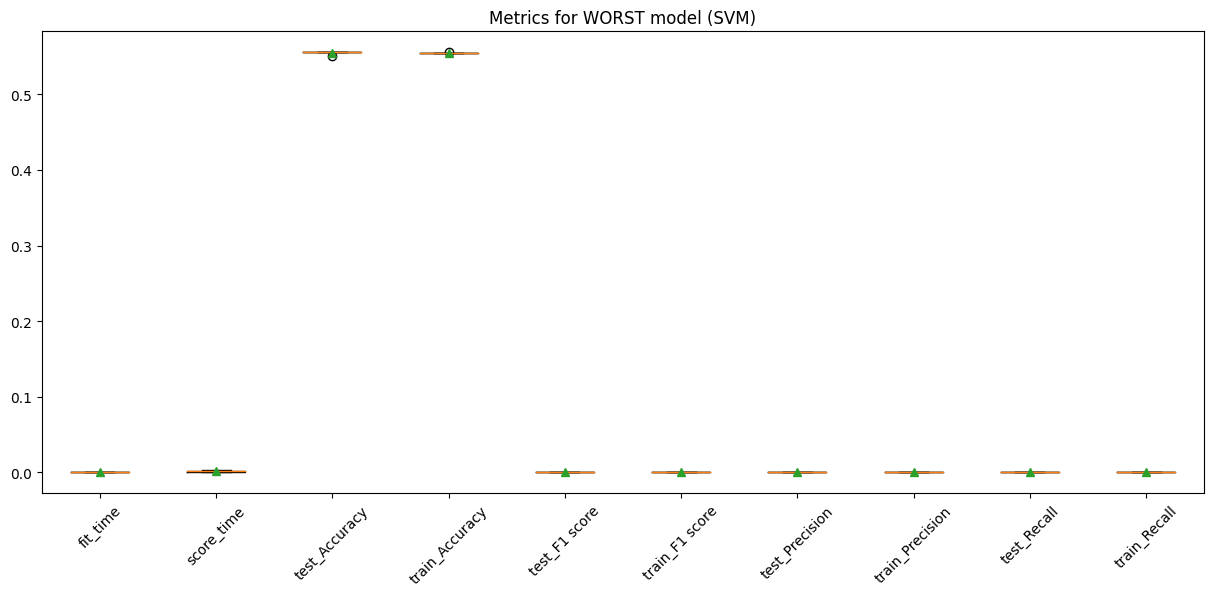

In [19]:

best_model_scores = pd.DataFrame(resultados[0])

plt.figure(figsize=(15, 6))
plt.title("Metrics for WORST model (SVM)")
plt.boxplot(best_model_scores, labels=['fit_time','score_time','test_Accuracy','train_Accuracy','test_F1 score'
                                    ,'train_F1 score','test_Precision','train_Precision','test_Recall','train_Recall'], showmeans=True)
plt.xticks(rotation=45)                                    
plt.show(block=True);

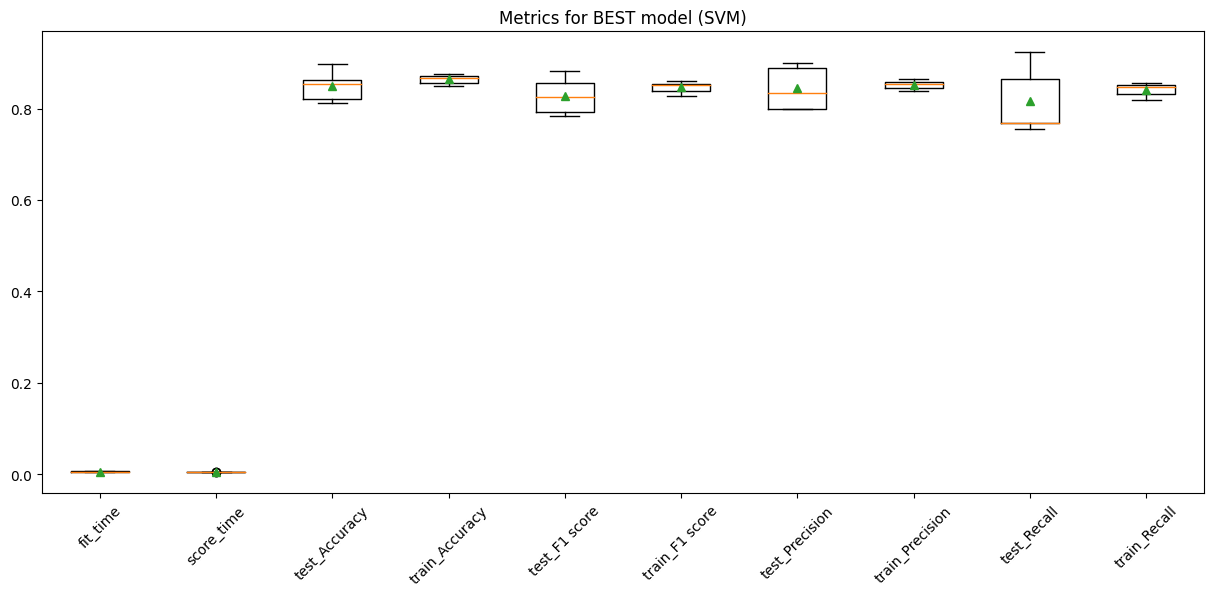

In [20]:
best_model_scores = pd.DataFrame(resultados[1])

plt.figure(figsize=(15, 6))
plt.title("Metrics for BEST model (SVM)")
plt.boxplot(best_model_scores, labels=['fit_time','score_time','test_Accuracy','train_Accuracy','test_F1 score'
                                    ,'train_F1 score','test_Precision','train_Precision','test_Recall','train_Recall'], showmeans=True)
plt.xticks(rotation=45)                                    
plt.show(block=True);

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de 
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, 
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno 
de estos problemas. 

    Nuestro modelo nunca converge, muestra un poco de sobreentrenamiento.

In [21]:


def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, xlabel, ylabel, title):

    try:
      train_mean = np.mean(train_scores, axis=1)
      train_std = np.std(train_scores, axis=1)
      val_mean = np.mean(val_scores, axis=1)
      val_std = np.std(val_scores, axis=1)
    except:
      train_mean = np.mean(train_scores)
      train_std = np.std(train_scores)
      val_mean = np.mean(val_scores)
      val_std = np.std(val_scores)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()



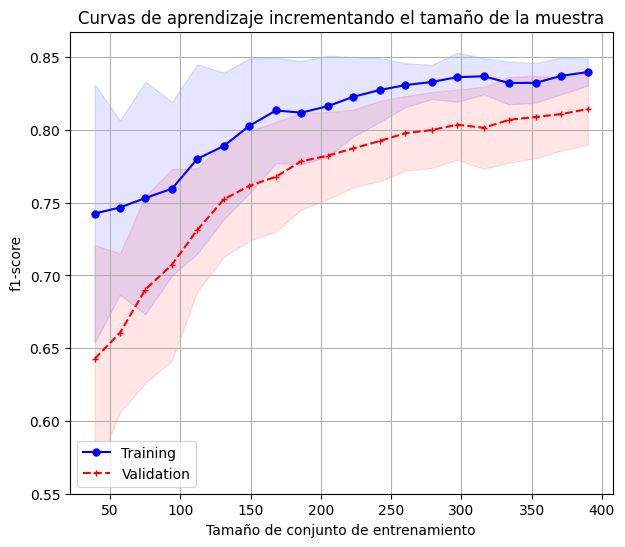

In [22]:


pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

delta_train_sz = np.linspace(0.1, 1, 20)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

# Other possible scorings check sklearn.metrics.SCORERS.keys()
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                          X = XtrainvalTransf,
                                          y = ytv.values.ravel(),
                                          cv = cv ,
                                          shuffle = True,
                                          train_sizes = delta_train_sz ,
                                          random_state=11,scoring ='f1')

# Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                 'Tamaño de conjunto de entrenamiento', 
                                                 'f1-score', 
                                                 'Curvas de aprendizaje incrementando el tamaño de la muestra')



#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva

In [23]:

#ypred = GS_SVM.predict(XtestTransf)
ypred = BestSVM_Model.predict(Xtest)

cm = confusion_matrix(ytest, ypred)    # los renglones son los reales y las columnas las predicciones.
print(cm)

tt = np.sum(cm)
print('real-0: [%.3f, %.3f]' % (cm[0,0]/tt, cm[0,1]/tt))
print('real-1: [%.3f, %.3f]' % (cm[1,0]/tt, cm[1,1]/tt))

[[57  1]
 [38  8]]
real-0: [0.548, 0.010]
real-1: [0.365, 0.077]


In [24]:
TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])
print('TP_rate-recall:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

TP_rate-recall:0.17391
FP_rate:0.01724


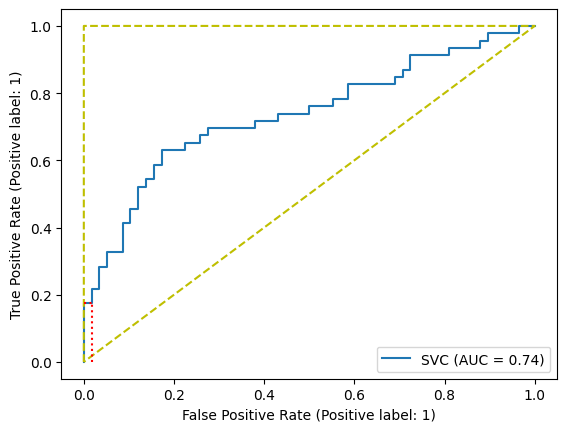

In [25]:
RocCurveDisplay.from_estimator(BestSVM_Model, Xtest, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  # Pero el mejor umbral para que ambos errores estén lo más equilibrados
plt.show()    

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica 
f1-score

In [26]:
None

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-mean

In [27]:
None

#**Ejercicio-10.**

. Incluye tus conclusiones finales de la actividad.

In [28]:
None

###**Fin de la Actividad de la semana 8.**